In [60]:
import pandas as pd

df_impostor = pd.read_csv('../datasets/answers-impostor-normilzed.csv')
df_impostor.head()

,impostor_1,impostor_2,impostor_3,impostor_4,impostor_5,impostor_6,impostor_7,impostor_8,impostor_9,impostor_10,impostor_11,impostor_12,impostor_13,impostor_14,impostor_15,impostor_16,impostor_17,impostor_18,impostor_19,impostor_20
0,3,4,4,4,4,5,5,5,3,3,3,5,5,5,4,4,5,4,1,3
1,3,2,4,3,3,2,5,4,1,5,1,4,1,4,4,2,4,4,2,4
2,2,2,4,4,3,1,2,1,1,3,2,1,1,4,1,1,4,2,5,2
3,5,5,5,5,3,5,5,5,1,5,3,3,5,5,3,1,3,5,5,2
4,3,3,2,1,2,2,1,1,1,1,1,1,3,3,5,1,3,4,5,4


<AxesSubplot:>

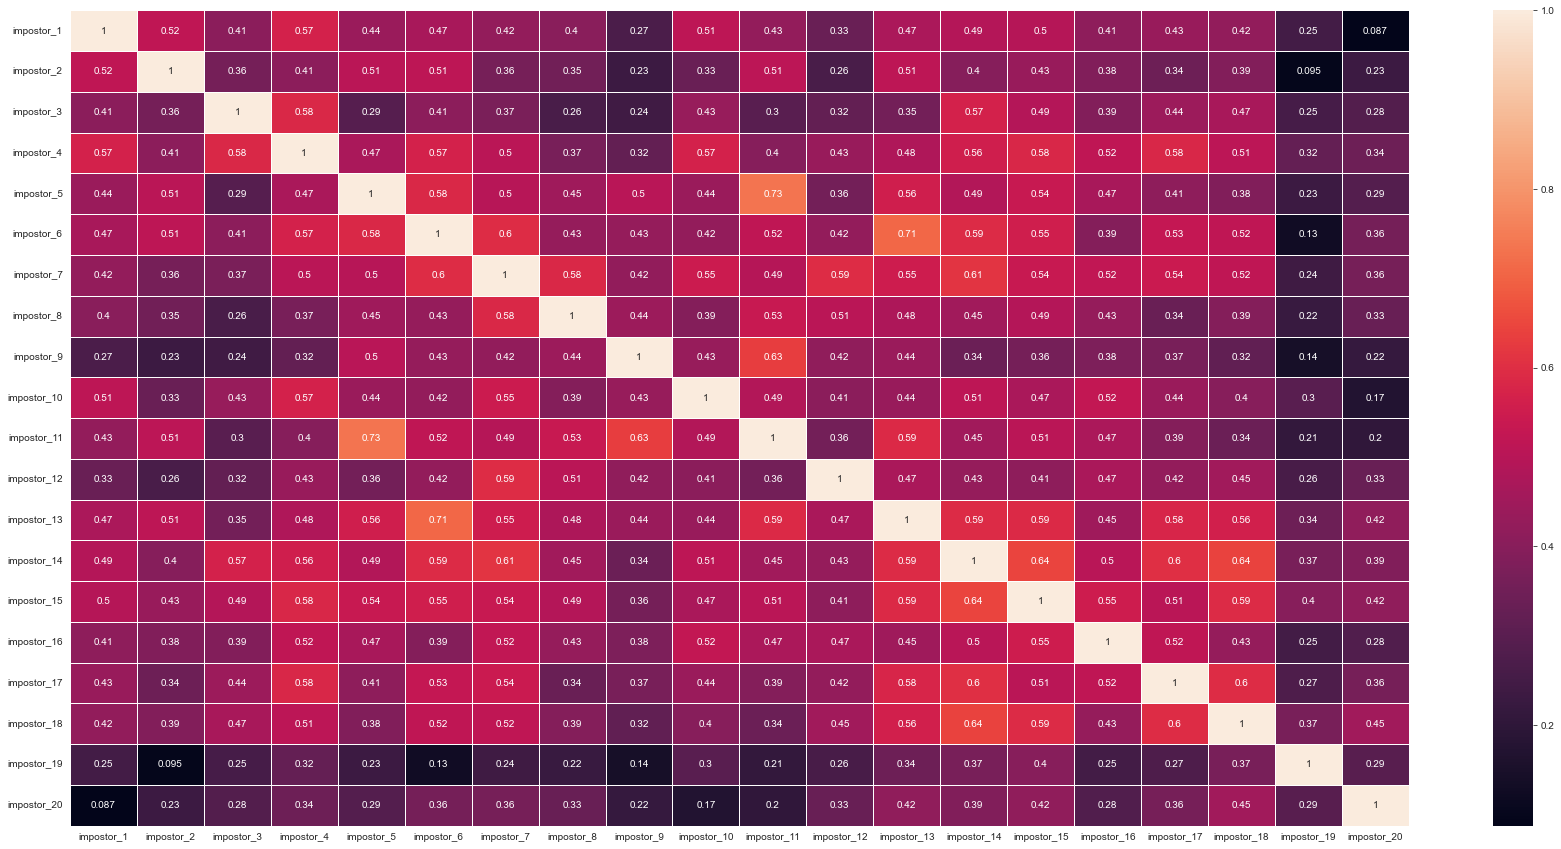

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_impostor = df_impostor.corr()

f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_impostor, annot=True, linewidths=.5, ax=ax)

---

In [62]:
df_efficacy = pd.read_csv('../datasets/answers-self-efficacy-answers-normalized.csv')
df_efficacy.head()

,auto_eficacia_1,auto_eficacia_2,auto_eficacia_3,auto_eficacia_4,auto_eficacia_5,auto_eficacia_6,auto_eficacia_7,auto_eficacia_8,auto_eficacia_9,auto_eficacia_10,...,auto_eficacia_25,auto_eficacia_26,auto_eficacia_27,auto_eficacia_28,auto_eficacia_29,auto_eficacia_30,auto_eficacia_31,auto_eficacia_32,auto_eficacia_33,auto_eficacia_34
0,8,9,9,10,10,9,10,9,8,7,...,10,10,10,10,10,10,10,10,10,10
1,10,8,8,9,10,9,9,9,10,10,...,8,9,8,9,9,10,10,10,10,10
2,10,10,10,10,8,10,10,10,9,10,...,10,10,10,10,10,10,10,10,10,10
3,5,6,8,8,6,5,7,7,7,6,...,9,9,9,7,5,8,7,2,9,7
4,10,10,9,10,10,10,10,10,10,10,...,10,7,10,10,10,10,10,10,9,10


<AxesSubplot:>

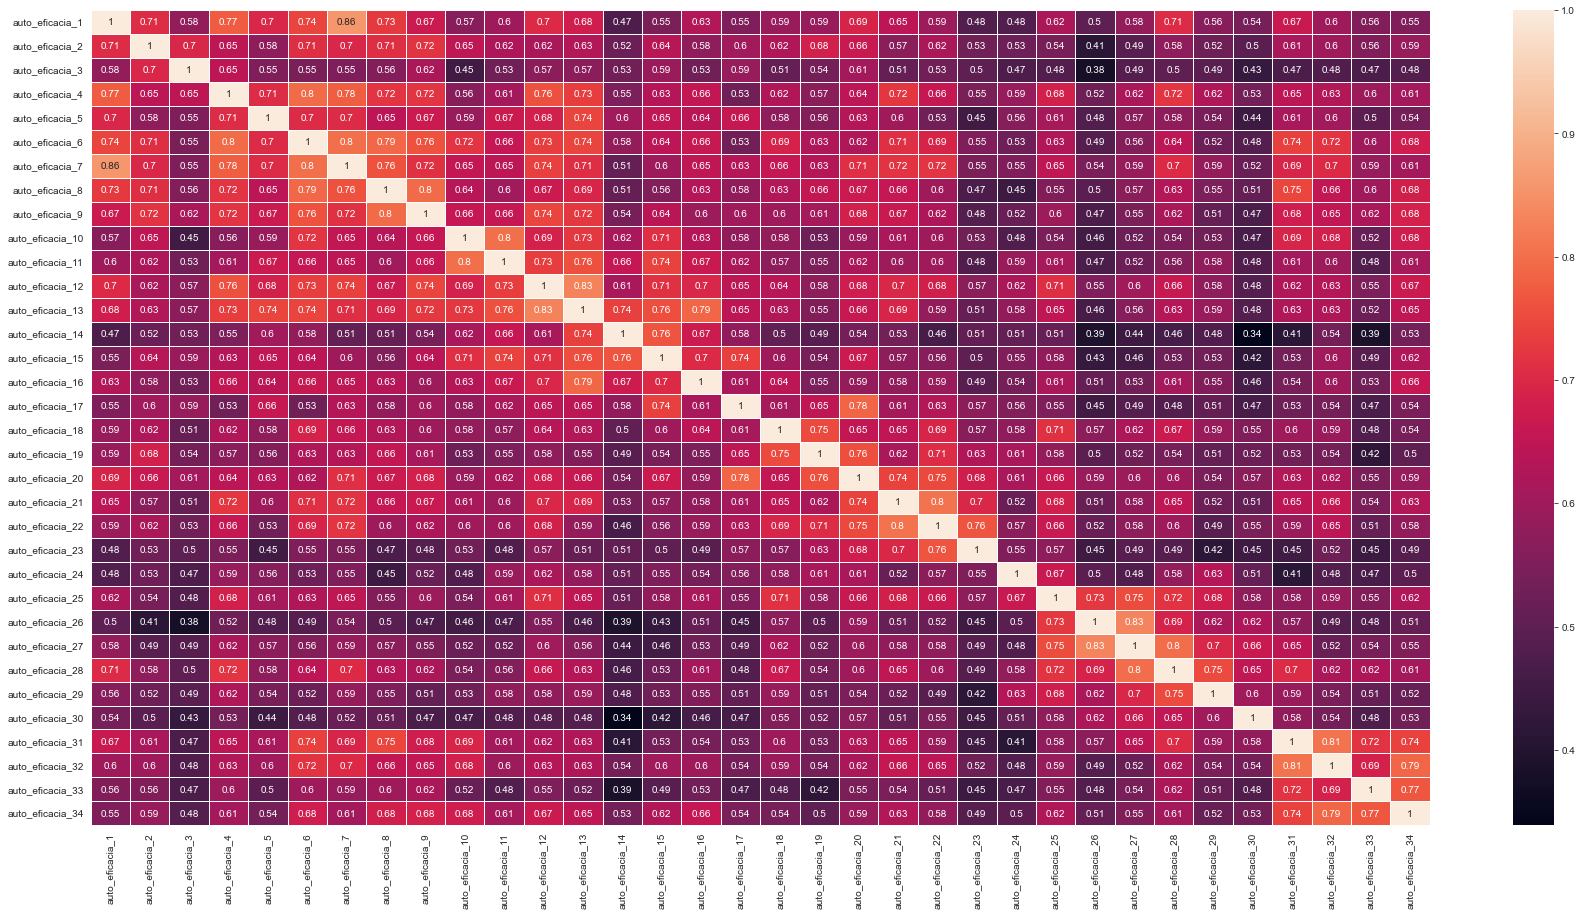

In [63]:
corr_efficacy = df_efficacy.corr()

f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr_efficacy, annot=True, linewidths=.5, ax=ax)

# PCA
---

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=18) # not in use... using standard scaler
scores_pca = pca.fit_transform(df_impostor)

Text(0, 0.5, 'cumulative explained variance')

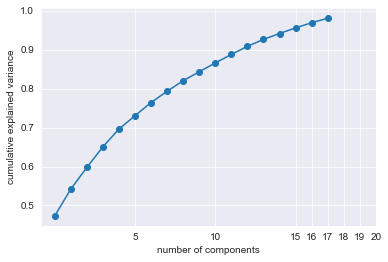

In [65]:
import numpy as np

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks([5, 10, 15, 16, 17, 18, 19, 20])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [66]:
np.cumsum(pca.explained_variance_ratio_)

array([0.47324759, 0.54206489, 0.59756988, 0.65072259, 0.69612029,
       0.73053532, 0.76430681, 0.79320349, 0.82032947, 0.84321328,
       0.86583977, 0.88770625, 0.9084114 , 0.92628649, 0.94137029,
       0.95583766, 0.96905453, 0.98057595])

## StandardScaler

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df_impostor)

In [68]:
pca = PCA(n_components=18)
pca.fit(X_std)
scores_pca_std = pca.transform(X_std)

Text(0, 0.5, 'cumulative explained variance')

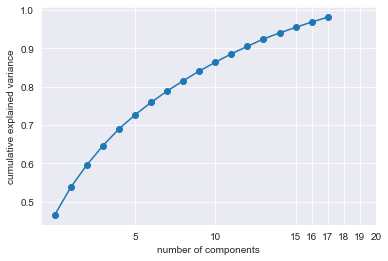

In [69]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks([5, 10, 15, 16, 17, 18, 19, 20])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [70]:
np.cumsum(pca.explained_variance_ratio_)

array([0.465734  , 0.53777247, 0.59592499, 0.64604216, 0.68962467,
       0.72640628, 0.75885843, 0.78844719, 0.81513893, 0.84054177,
       0.86341747, 0.88534289, 0.90498749, 0.92407811, 0.93986328,
       0.95413739, 0.96825614, 0.98069519])

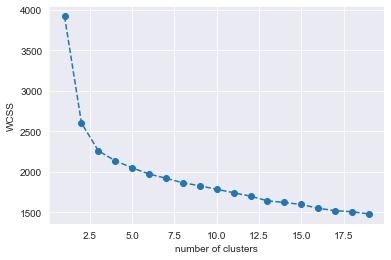

In [71]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=10)
    kmeans.fit(scores_pca_std)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

# reference here: https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [72]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scores_pca_std)
kmeans.labels_, kmeans.predict(scores_pca_std)

(array([2, 0, 1, 2, 1, 1, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 3, 0, 1, 2, 2, 2,
        1, 3, 2, 3, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 2, 1, 2, 3, 0, 3,
        1, 3, 2, 2, 0, 3, 1, 0, 3, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1,
        3, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 3, 1,
        3, 0, 2, 3, 2, 2, 0, 3, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 2,
        1, 2, 0, 3, 1, 1, 0, 1, 2, 0, 2, 3, 3, 2, 0, 3, 1, 0, 2, 2, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 3, 2, 0, 3, 0, 0, 0, 0, 0,
        2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 3, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2,
        3, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 2, 3, 0, 2, 2, 2, 2, 0, 2, 3, 2,
        2, 0], dtype=int32),
 array([2, 0, 1, 2, 1, 1, 2, 3, 0, 1, 1, 2, 2, 0, 0, 2, 3, 0, 1, 2, 2, 2,
        1, 3, 2, 3, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 2, 1, 2, 3, 0, 3,
        1, 3, 2, 2, 0, 3, 1, 0, 3, 2, 0, 3, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1,
        3, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 0, 2, 2, 1, 2, 3, 0, 0, 2, 3, 1,
        3

In [73]:
categories_kmeans = pd.Series(kmeans.predict(scores_pca_std))
categories_kmeans = categories_kmeans.map({ 0: 'A', 1: 'B', 2: 'C', 3: 'D' })

In [74]:
def impostor_scale_transformation(val) -> str:
    if val >= 80:
        return 'ELEVADO'
    if val >= 61:
        return 'ALTO'
    if val >= 41:
        return 'MODERADO'

    return 'BAIXO'

categories_impostor = df_impostor.sum(axis=1)
categories_impostor = pd.concat([categories_impostor, categories_impostor[:].apply(impostor_scale_transformation)], keys=['sum', 'impostor'], axis=1)

In [75]:
categories = pd.concat([categories_impostor.iloc[:, 0], categories_impostor.iloc[:, 1], categories_kmeans], keys=['sum', 'impostor', 'kmeans'], axis=1)
categories

,sum,impostor,kmeans
0,79,ALTO,C
1,62,ALTO,A
2,46,MODERADO,B
3,79,ALTO,C
4,47,MODERADO,B
...,...,...,...
195,80,ELEVADO,C
196,40,BAIXO,D
197,76,ALTO,C
198,90,ELEVADO,C


In [76]:
final_corr = pd.concat([pd.get_dummies(categories['impostor']), pd.get_dummies(categories['kmeans'])], axis=1).corr()
final_corr

,ALTO,BAIXO,ELEVADO,MODERADO,A,B,C,D
ALTO,1.000000,-0.293085,-0.365135,-0.503088,0.631132,-0.434037,0.036778,-0.311652
BAIXO,-0.293085,1.000000,-0.194437,-0.267898,-0.246361,-0.163988,-0.267898,0.858468
ELEVADO,-0.365135,-0.194437,1.000000,-0.333756,-0.306925,-0.287946,0.725787,-0.206755
MODERADO,-0.503088,-0.267898,-0.333756,1.000000,-0.207128,0.813353,-0.459854,-0.134145
A,0.631132,-0.246361,-0.306925,-0.207128,1.000000,-0.364842,-0.422885,-0.261968
B,-0.434037,-0.163988,-0.287946,0.813353,-0.364842,1.000000,-0.396736,-0.245770
C,0.036778,-0.267898,0.725787,-0.459854,-0.422885,-0.396736,1.000000,-0.284870
D,-0.311652,0.858468,-0.206755,-0.134145,-0.261968,-0.245770,-0.284870,1.000000


<AxesSubplot:>

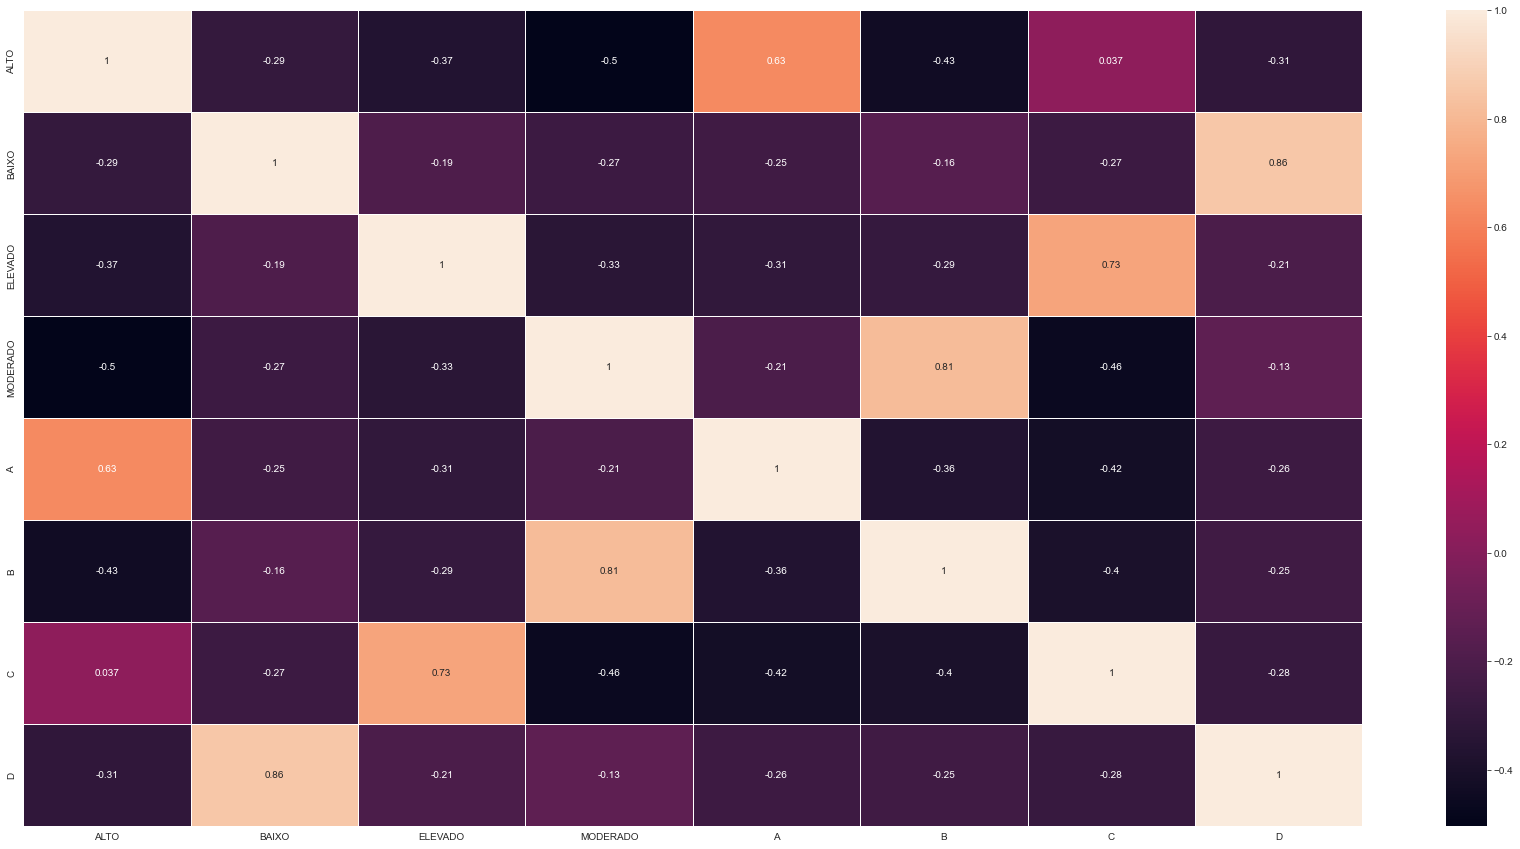

In [77]:
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(final_corr, annot=True, linewidths=.5, ax=ax)

In [78]:
def kmeans_scale_transformation(val) -> str:
    if val == 'A':
        return 'ALTO'
    if val == 'B':
        return 'MODERADO'
    if val == 'C':
        return 'ELEVADO'
    if val == 'D':
        return 'BAIXO'

    return 'NAO_IDENTIFICADO'

categories['kmeans'] = categories['kmeans'].apply(kmeans_scale_transformation)
categories

,sum,impostor,kmeans
0,79,ALTO,ELEVADO
1,62,ALTO,ALTO
2,46,MODERADO,MODERADO
3,79,ALTO,ELEVADO
4,47,MODERADO,MODERADO
...,...,...,...
195,80,ELEVADO,ELEVADO
196,40,BAIXO,BAIXO
197,76,ALTO,ELEVADO
198,90,ELEVADO,ELEVADO


In [79]:
# categories.apply()
categories.apply(lambda x: x.iloc[: :])

,sum,impostor,kmeans
0,79,ALTO,ELEVADO
1,62,ALTO,ALTO
2,46,MODERADO,MODERADO
3,79,ALTO,ELEVADO
4,47,MODERADO,MODERADO
...,...,...,...
195,80,ELEVADO,ELEVADO
196,40,BAIXO,BAIXO
197,76,ALTO,ELEVADO
198,90,ELEVADO,ELEVADO


In [80]:
categories['impostor'].compare(categories['kmeans']).rename(columns = { 'self': 'impostor', 'other': 'kmeans' })

,impostor,kmeans
0,ALTO,ELEVADO
3,ALTO,ELEVADO
6,ALTO,ELEVADO
11,ALTO,ELEVADO
19,ALTO,ELEVADO
23,MODERADO,BAIXO
25,MODERADO,BAIXO
27,ALTO,ELEVADO
28,ALTO,ELEVADO
40,ALTO,ELEVADO


In [81]:
match_percent = 100 - (categories['impostor'].compare(categories['kmeans']).size / categories.shape[0] * 100)
print(f'Match: {match_percent}%')

Match: 60.0%


---

In [82]:
df_test = pd.read_excel('../datasets/answers-test.xlsx')

df_test = df_test[['18.1', '18.2', '18.3', '18.4', '18.5', '18.6', '18.7', '18.8', '18.9', '18.10','18.11', '18.12', '18.13', '18.14', '18.15', '18.16', '18.17', '18.18', '18.19', '18.20']]

df_test.columns = ['impostor_1', 'impostor_2', 'impostor_3', 'impostor_4', 'impostor_5', 'impostor_6', 'impostor_7','impostor_8', 'impostor_9', 'impostor_10', 'impostor_11', 'impostor_12', 'impostor_13', 'impostor_14', 'impostor_15','impostor_16', 'impostor_17', 'impostor_18', 'impostor_19', 'impostor_20']

df_test.head()


X_std_test = scaler.transform(df_test)
scores_pca_std_test = pca.transform(X_std_test)

category_test = pd.Series(kmeans.predict(scores_pca_std_test)).map({ 0: 'A', 1: 'B', 2: 'C', 3: 'D' })[0]

print('Impostor scale: ' + impostor_scale_transformation(df_test.sum(axis=1)[0]))
print('KMeans: ' + kmeans_scale_transformation(category_test))

impostor: ELEVADO
KMeans: ELEVADO
